In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = {'Age':[-500, -600, 25,22,26,24,17,3,2,1,35,95,98], 'Salary':[12000, 25000, 17000, 18000, 19000, 20000, 4500, 5400, 8000,90000, 80000, 5000, 3000]}
df = pd.DataFrame(data)

In [7]:
#Z score 
from scipy import stats
zscore=np.abs(stats.zscore(df))
print(zscore)

[[2.07721243 0.42837571]
 [2.54700648 0.05138237]
 [0.3892063  0.24385337]
 [0.37511247 0.2069489 ]
 [0.39390424 0.17004443]
 [0.38450836 0.13313997]
 [0.35162277 0.70515922]
 [0.28585161 0.6719452 ]
 [0.28115367 0.57599358]
 [0.27645573 2.4501728 ]
 [0.4361857  2.08112812]
 [0.71806213 0.68670699]
 [0.73215595 0.76051592]]


In [8]:
threshold=2
df_clean=df
df_clean=df_clean[(zscore<threshold).all(axis=1)]
print(df.shape)
print(df_clean.shape)

(13, 2)
(9, 2)


In [37]:
#IQR

In [41]:
# df_iqr=df
# Q1=df_iqr.quantile(0.25)
# Q3=df_iqr.quantile(0.75)
# IQR=Q3-Q1
# df_iqr=df_iqr[~(df_iqr<(Q1-1.5*IQR))|(df_iqr>(Q3+1.5*IQR))]
# df_iqr.shape
# df_iqr

In [14]:
def Outliers(column_name):
    for j in column_name:
        Q3=df[j].quantile(0.75)
        Q1=df[j].quantile(0.25)
        IQR = df[j].quantile(0.75) - df[j].quantile(0.25)
        H=1.5*IQR
        Upper_Whiskar = Q3+H
        Lower_Whiskar = Q1-H
        Q95 = df[j].quantile(0.95)
        Q05 = df[j].quantile(0.05)
    
        print('Q3 for ',j, ': ', Q3)
        print('Q1 for ',j,': ', Q1)
        print('IQR for ',j,': ', IQR)
        print('H for ',j,': ', H)
        print('Upper Whiskar for ',j,': ', Upper_Whiskar)
        print('Lower Whiskar for ',j,': ', Lower_Whiskar)
    
        print('95th Quantile for ',j,': ', Q95)
        print('5th Quantile for',j,': ', Q05)
        ##df3[j] = df[j].clip(lower=Lower_Whiskar,upper = Upper_Whiskar, inplace=False)
        ##df[j].clip(lower=Lower_Whiskar,upper = Upper_Whiskar, inplace=True)
        for i in df[j].index.tolist():
            if(df.at[i,j]<Lower_Whiskar):
                df.at[i,j]= Q05
            if(df.at[i,j]>Upper_Whiskar):
                df.at[i,j]=Q95

            

In [15]:
Outliers(['Age', 'Salary'])
df

Q3 for  Age :  26.0
Q1 for  Age :  2.0
IQR for  Age :  24.0
H for  Age :  36.0
Upper Whiskar for  Age :  62.0
Lower Whiskar for  Age :  -34.0
95th Quantile for  Age :  96.19999999999999
5th Quantile for Age :  -540.0
Q3 for  Salary :  20000.0
Q1 for  Salary :  5400.0
IQR for  Salary :  14600.0
H for  Salary :  21900.0
Upper Whiskar for  Salary :  41900.0
Lower Whiskar for  Salary :  -16500.0
95th Quantile for  Salary :  83999.99999999999
5th Quantile for Salary :  3900.0


,Age,Salary
0,-540,12000
1,-540,25000
2,25,17000
3,22,18000
4,26,19000
5,24,20000
6,17,4500
7,3,5400
8,2,8000
9,1,83999


In [25]:
#Log Transform

<AxesSubplot:>

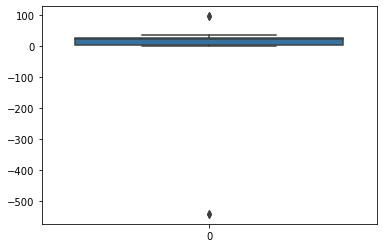

In [16]:
sns.boxplot(data=df['Age'])

C:\Users\vish\anaconda3_64\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

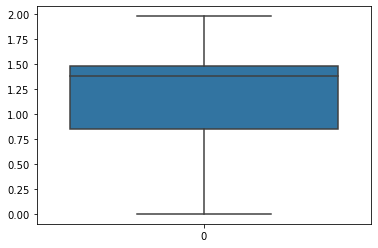

In [17]:
sns.boxplot(data=np.log10(df['Age']))